## Step 1: Importing a Data set: Restaurant Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/user/LearnablePandas/restaurant_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [4]:
df.describe

<bound method NDFrame.describe of                  Name  Location   Cuisine  Rating  Seating Capacity  \
0        Restaurant 0     Rural  Japanese     4.0                38   
1        Restaurant 1  Downtown   Mexican     3.2                76   
2        Restaurant 2     Rural   Italian     4.7                48   
3        Restaurant 3     Rural   Italian     4.4                34   
4        Restaurant 4  Downtown  Japanese     4.9                88   
...               ...       ...       ...     ...               ...   
8363  Restaurant 8363  Suburban    Indian     3.4                54   
8364  Restaurant 8364     Rural    Indian     3.7                49   
8365  Restaurant 8365  Downtown   Italian     4.7                88   
8366  Restaurant 8366     Rural  American     3.1                31   
8367  Restaurant 8367     Rural  Japanese     4.0                33   

      Average Meal Price  Marketing Budget  Social Media Followers  \
0                  73.98              2224 

In [5]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


Text(0.5, 1.0, 'Histogram Distribution of Revenue')

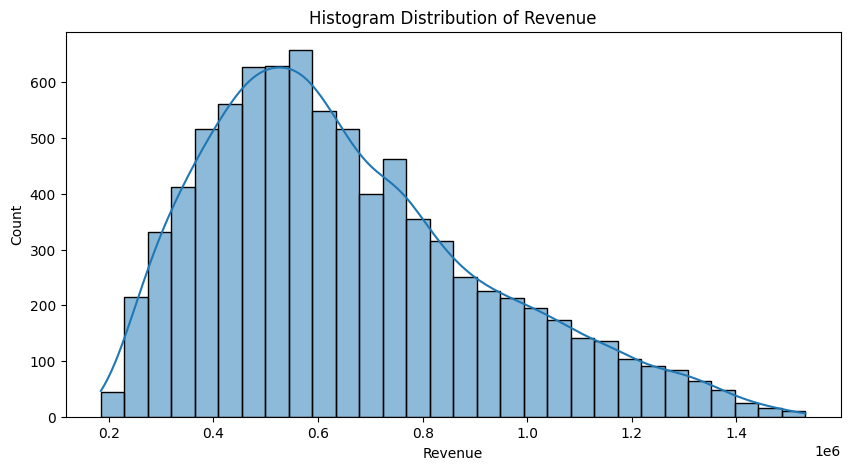

In [6]:
## Histogram plot

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Revenue', bins=30, kde=True)
plt.title('Histogram Distribution of Revenue')

* You can observe our dataset is affected by presence of outliers from the histogram plot

* Rightly skewed restaurants with long tail and below 20 out of 1000 randomly selected restaurants with higher revenues than 'usual' others

* I want a case where the outliers are handled using transform logarithm method 

* In this example, the 'Revenue' scale adjusts from measured $1 million Dollars as 13.8 with np.log1p

### Handling Anomaly / outliers

* I will employ interquartile range to calculate for the outlier

In [7]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)

#Computing for IQR 

IQR = Q3 - Q1

#calculating for boundaries

lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

print(lower_boundary)
print(upper_boundary)

-83012.85125000007
1350758.47875


In [8]:
#Using transform log to handle the outliers

df['Revenue'] = np.log1p(df['Revenue'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [10]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

We can see that we have no missing numbers

## Statistical analysis

In [11]:
df.describe

<bound method NDFrame.describe of                  Name  Location   Cuisine  Rating  Seating Capacity  \
0        Restaurant 0     Rural  Japanese     4.0                38   
1        Restaurant 1  Downtown   Mexican     3.2                76   
2        Restaurant 2     Rural   Italian     4.7                48   
3        Restaurant 3     Rural   Italian     4.4                34   
4        Restaurant 4  Downtown  Japanese     4.9                88   
...               ...       ...       ...     ...               ...   
8363  Restaurant 8363  Suburban    Indian     3.4                54   
8364  Restaurant 8364     Rural    Indian     3.7                49   
8365  Restaurant 8365  Downtown   Italian     4.7                88   
8366  Restaurant 8366     Rural  American     3.1                31   
8367  Restaurant 8367     Rural  Japanese     4.0                33   

      Average Meal Price  Marketing Budget  Social Media Followers  \
0                  73.98              2224 

In [12]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,13.311290
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,0.411456
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,12.126540
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,13.027288
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,13.311732
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,13.608603
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,14.241999


In [13]:
print(df.describe())

            Rating  Seating Capacity  Average Meal Price  Marketing Budget  \
count  8368.000000       8368.000000         8368.000000       8368.000000   
mean      4.008258         60.212835           47.896659       3218.254900   
std       0.581474         17.399488           14.336767       1824.896053   
min       3.000000         30.000000           25.000000        604.000000   
25%       3.500000         45.000000           35.490000       1889.000000   
50%       4.000000         60.000000           45.535000       2846.500000   
75%       4.500000         75.000000           60.300000       4008.500000   
max       5.000000         90.000000           76.000000       9978.000000   

       Social Media Followers  Chef Experience Years  Number of Reviews  \
count             8368.000000            8368.000000        8368.000000   
mean             36190.621773              10.051984         523.010397   
std              18630.153330               5.516606         277.215127 

### Top 5 restaurants by revenues

In [14]:
df

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,13.367576
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,13.102587
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,13.201858
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,12.910550
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,14.214989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,12.982307
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590194,2.7,2.6,No,37,21,12.935983
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,13.743367
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,12.649137


In [15]:
df ['Revenue'].sort_values(ascending=False).head(5)

4324    14.241999
7093    14.233541
3952    14.231318
5431    14.231270
2196    14.227218
Name: Revenue, dtype: float64

In [16]:
Top_5_Restaurant = df.nlargest(n=5, columns= 'Revenue')

Top_5_Restaurant

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
4324,Restaurant 4324,Downtown,Japanese,4.1,90,75.83,3115,34238,17,535,215.186349,5.5,5.7,No,33,62,14.241999
7093,Restaurant 7093,Downtown,Japanese,3.6,90,75.41,4666,45465,15,776,239.065091,1.2,8.8,Yes,7,17,14.233541
3952,Restaurant 3952,Downtown,Japanese,4.1,90,74.80,6627,72844,17,693,87.249043,7.8,4.4,No,21,22,14.231318
5431,Restaurant 5431,Downtown,Japanese,4.5,89,75.51,6812,68002,18,907,195.191807,4.6,1.7,Yes,10,85,14.231270
2196,Restaurant 2196,Downtown,Japanese,3.6,90,75.51,2057,25811,3,308,115.570703,9.5,2.8,No,22,70,14.227218


In [17]:
Top_5_Restaurant.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.980000,89.800000,75.412000,4655.400000,49272.00000,14.000000,643.800000,170.452598,5.720000,4.680000,18.600000,51.200000,14.233069
std,0.383406,0.447214,0.376988,2101.354159,20599.66632,6.244998,231.176772,65.680410,3.176004,2.761702,10.406729,30.144651,0.005489
min,3.600000,89.000000,74.800000,2057.000000,25811.00000,3.000000,308.000000,87.249043,1.200000,1.700000,7.000000,17.000000,14.227218
25%,3.600000,90.000000,75.410000,3115.000000,34238.00000,15.000000,535.000000,115.570703,4.600000,2.800000,10.000000,22.000000,14.231270
50%,4.100000,90.000000,75.510000,4666.000000,45465.00000,17.000000,693.000000,195.191807,5.500000,4.400000,21.000000,62.000000,14.231318
75%,4.100000,90.000000,75.510000,6627.000000,68002.00000,17.000000,776.000000,215.186349,7.800000,5.700000,22.000000,70.000000,14.233541
max,4.500000,90.000000,75.830000,6812.000000,72844.00000,18.000000,907.000000,239.065091,9.500000,8.800000,33.000000,85.000000,14.241999


### Will further visualize the dataset distribution

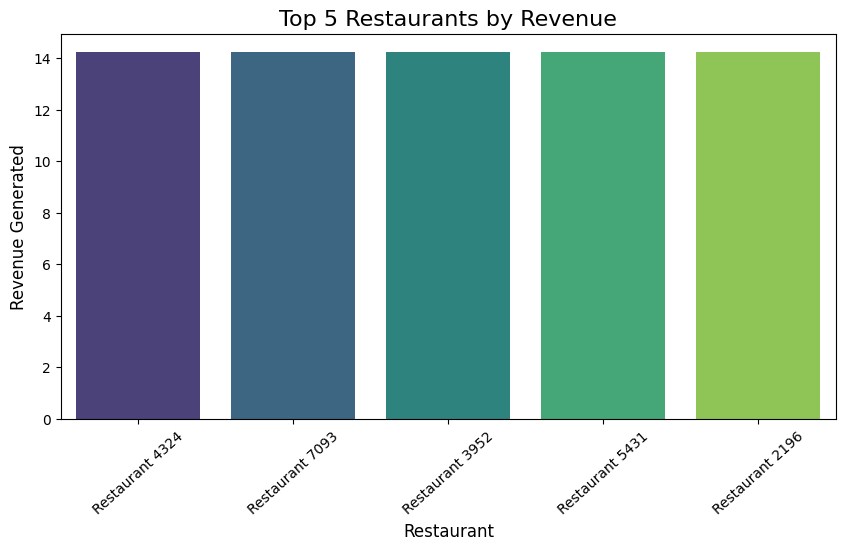

In [18]:
#Using BarChart to visualze for top 5 restaurants by revenue

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Name', y='Revenue', data=Top_5_Restaurant, palette='viridis')
plt.title("Top 5 Restaurants by Revenue", fontsize=16)
plt.xlabel("Restaurant", fontsize=12)
plt.ylabel("Revenue Generated", fontsize=12)
plt.xticks(rotation=42)
plt.show()

* Top 5 restaurant by revenue could be seen from the bar chart above. 

* Topping the chart is Restaurant 4,324 with a revenue of $1.53 million 

* Also note how little different they top the list with at 1.5% difference in the generated revenues

### Five most Rated Restaurant

In [19]:
Top_5_Rated = df.nlargest(5, 'Rating')

print(Top_5_Rated[['Name', 'Rating']])

               Name  Rating
9      Restaurant 9     5.0
17    Restaurant 17     5.0
199  Restaurant 199     5.0
220  Restaurant 220     5.0
264  Restaurant 264     5.0


In [20]:
Top_5_Rated.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,5.0,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.0,61.80000,63.954000,3935.400000,43772.800000,12.200000,789.200000,204.463162,7.820000,4.880000,27.400000,40.400000,13.657251
std,0.0,20.20396,6.722688,1352.776885,15989.733416,4.764452,281.837187,83.483037,1.293058,2.430432,24.955961,25.234896,0.383797
min,5.0,32.00000,55.950000,2569.000000,28419.000000,6.000000,289.000000,64.749173,6.400000,1.500000,7.000000,12.000000,13.023474
25%,5.0,56.00000,59.800000,2788.000000,29471.000000,9.000000,874.000000,205.289815,6.600000,4.200000,12.000000,19.000000,13.636532
50%,5.0,62.00000,64.420000,3994.000000,42576.000000,13.000000,905.000000,215.494168,8.000000,4.200000,24.000000,41.000000,13.717697
75%,5.0,73.00000,65.870000,4415.000000,51952.000000,15.000000,907.000000,262.837768,8.800000,7.100000,24.000000,59.000000,13.895117
max,5.0,86.00000,73.730000,5911.000000,66446.000000,18.000000,971.000000,273.944887,9.300000,7.400000,70.000000,71.000000,14.013432


### Visualizing Top Rated Restaurants

In [21]:
#Format function for rating

def format_rating(x, pos):
    return f"${x:,.2f}"

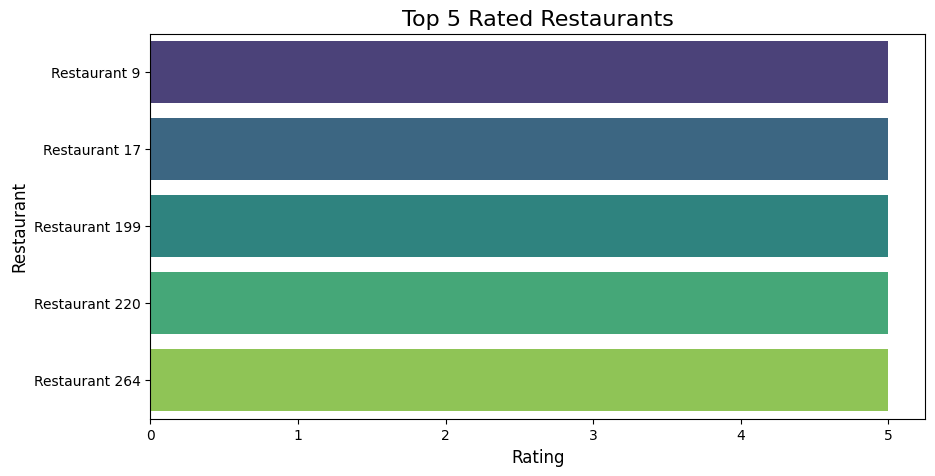

In [22]:
#Using Horizonatal Barchart to visualize top 5 rated restaurants

plt.figure(figsize=(10, 5))

sns.barplot(x='Rating', y='Name', data=Top_5_Rated, palette='viridis')
    
plt.title("Top 5 Rated Restaurants", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Restaurant", fontsize=12)
plt.show()

* The horizontal bar plot shows the top 5 rated restuarants.  

* Ratings are all 5.0, shown from equal length of bars for the restaurants

* Restaurants 9, 17, 199, 220 and 264 are all rated top 5 for five star ratings

### Exploratory Data Analysis on Revenue and other features of the Dataset

In [23]:
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,13.367576
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,13.102587
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,13.201858
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,12.910550
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,14.214989


In [24]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,13.311290
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,0.411456
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,12.126540
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,13.027288
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,13.311732
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,13.608603
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,14.241999


#### Univariate Analysis

Text(0.5, 1.0, 'Histogram Distribution of Revenue')

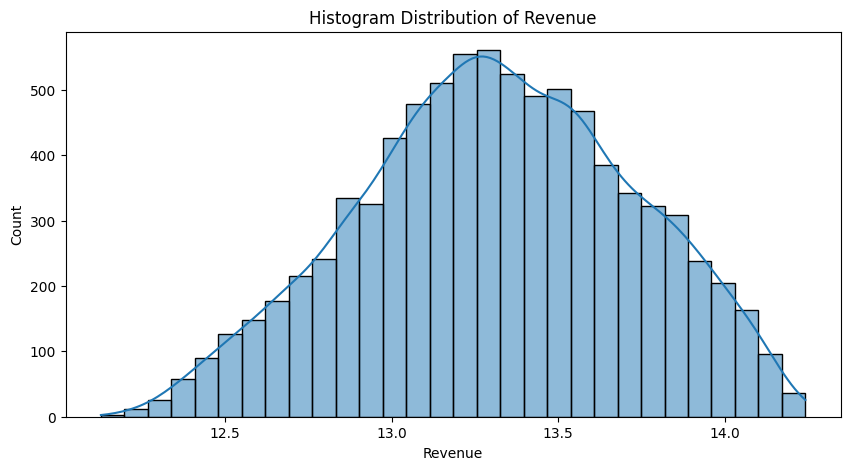

In [25]:
## Histogram plot

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Revenue', bins=30, kde=True)
plt.title('Histogram Distribution of Revenue')

* After hadling the outliers in our dataset by using transform logarithm, our histogram plotting was significantly readjusted starting with the scale on the revenue axis as compared to when not transformed - refer to histogram plot before transforming the datasets to handle outliers. 

* From the histogram plot of the transform data, we could observe how the tail of the dataset is skewing towards the left, indicating 

Text(0.5, 1.0, 'Box Plot of Revenue')

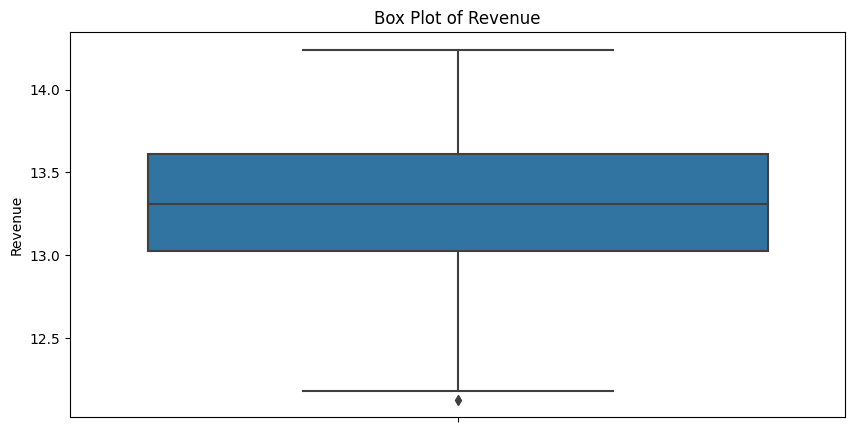

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['Revenue'])
plt.title("Box Plot of Revenue")

* The box plot shows that 50% of our selected dataset were at 0.5 to 0.6 (read in hundreds of thousands)

* This can be corroborated from the histogram plot which shows the general or mean revenue prices at bins 0.5 - 0.6. 

* Looking at the outlier, we can see how the outliers are represented along the box whiskers. 

* This also represents the few high revenue-generating restaurants which is represented as the 95th quatile (5%) of the dataset

#### Bivariate Analysis

* We will classify our bivariate analysis into categorical and numerical data
* As our dataset has location, cuisine and parking availability as categorical and rating, average meal price, service quality score, etc are numerical
* We will further treat them differently when comparing with 'Revenue'

In [27]:
df

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,13.367576
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,13.102587
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,13.201858
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,12.910550
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,14.214989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,12.982307
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590194,2.7,2.6,No,37,21,12.935983
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,13.743367
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,12.649137


In [28]:
#Creating a subset of numerical datasets from our sample data

num_data = ['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
            'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score',
            'Weekend Reservations', 'Weekday Reservations', 'Revenue'
    
]

#Creating a subset of numerical and categorical datasets from our sample data

cate_data = ['Location', 'Cuisine', 'Parking Availability']

In [29]:
#Calculation the correlation of the datasets as against 'Revenue'
df_correlation_matrix = df[num_data].corr()

print(df_correlation_matrix)

                          Rating  Seating Capacity  Average Meal Price  \
Rating                  1.000000          0.004862           -0.002265   
Seating Capacity        0.004862          1.000000           -0.028809   
Average Meal Price     -0.002265         -0.028809            1.000000   
Marketing Budget        0.263448          0.509560           -0.002054   
Social Media Followers  0.289559          0.496917           -0.005753   
Chef Experience Years   0.022192          0.010324            0.000401   
Number of Reviews      -0.004238         -0.016100            0.001802   
Avg Review Length      -0.001272         -0.032670            0.016013   
Ambience Score          0.007099          0.002842           -0.001094   
Service Quality Score   0.000887         -0.006400            0.011714   
Weekend Reservations   -0.000274          0.437416           -0.018072   
Weekday Reservations    0.001706          0.418636           -0.027837   
Revenue                 0.007067      

In [30]:
df_correlation_matrix

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
Rating,1.000000,0.004862,-0.002265,0.263448,0.289559,0.022192,-0.004238,-0.001272,0.007099,0.000887,-0.000274,0.001706,0.007067
Seating Capacity,0.004862,1.000000,-0.028809,0.509560,0.496917,0.010324,-0.016100,-0.032670,0.002842,-0.006400,0.437416,0.418636,0.701164
Average Meal Price,-0.002265,-0.028809,1.000000,-0.002054,-0.005753,0.000401,0.001802,0.016013,-0.001094,0.011714,-0.018072,-0.027837,0.679554
Marketing Budget,0.263448,0.509560,-0.002054,1.000000,0.987511,0.021612,-0.008985,-0.030064,0.008120,-0.000693,0.225355,0.221088,0.356387
Social Media Followers,0.289559,0.496917,-0.005753,0.987511,1.000000,0.022943,-0.009181,-0.025464,0.007428,0.000210,0.218451,0.214612,0.344938
Chef Experience Years,0.022192,0.010324,0.000401,0.021612,0.022943,1.000000,-0.007710,0.001865,-0.001288,-0.008508,-0.000372,-0.008823,0.034423
Number of Reviews,-0.004238,-0.016100,0.001802,-0.008985,-0.009181,-0.007710,1.000000,0.005842,0.010186,0.005432,0.000780,-0.006126,-0.009667
Avg Review Length,-0.001272,-0.032670,0.016013,-0.030064,-0.025464,0.001865,0.005842,1.000000,0.004807,0.008836,-0.014241,-0.011020,-0.011548
Ambience Score,0.007099,0.002842,-0.001094,0.008120,0.007428,-0.001288,0.010186,0.004807,1.000000,0.000612,-0.012207,-0.016652,0.007302
Service Quality Score,0.000887,-0.006400,0.011714,-0.000693,0.000210,-0.008508,0.005432,0.008836,0.000612,1.000000,-0.002689,0.004204,0.006720


#### Bivariate Visualization for Numerical Categorical Data 

Text(0.5, 1.0, 'Heat Map of Correlation Between Revenue and Numeric Features')

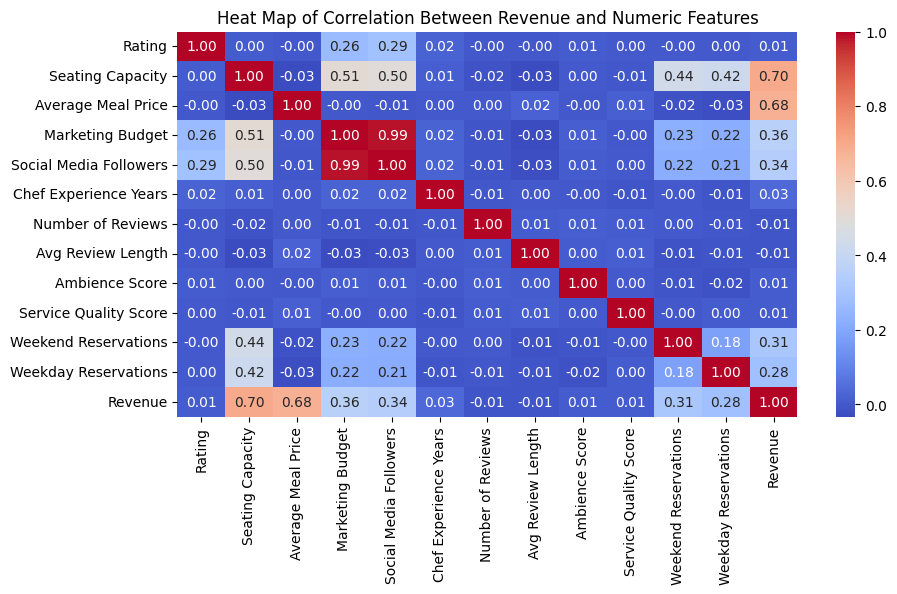

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df[num_data].corr(), annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Heat Map of Correlation Between Revenue and Numeric Features')

* The heat map above shows the visual representation of the calculated correlation matrix between revenue and other numeric datapoints

* Correlation matrix of 1 and -1 indicates strong positive or negative correlation

* The map interestingly shows a correlation of 0.69 and 0.67 between 'Revenue and Seating Capacity' and 'Revenue and Average Meal Price'

* This shows a considerable impact or directly affecting the revenue generated (which makes sense when you check - great people and meal price decides amount of money to be made)

* Other correlations between seating capacity and weekly and weekday reservations at .48 and .41

* Whereby 'Seating Capacity' was equally correlated to marketing budget and average social media followers. This indicates traces of impacts on social media presence and amount of budget dedicated to getting new customers through marketers. 

* May also indicate with greater budgets on marketing including social media presence indicates the more seating capacity needed. So it means marketing and social media affects how people find restaurants too! 

#### Using Scatter plots to visualize for correlated datasets with Renenue at >0.40

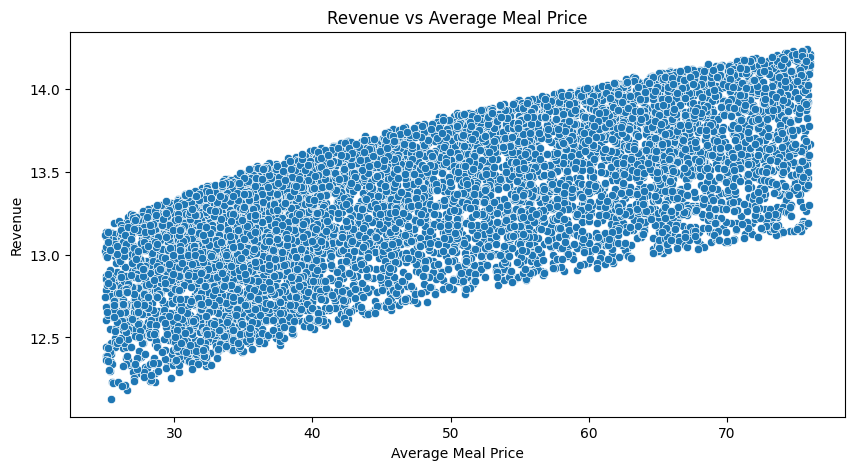

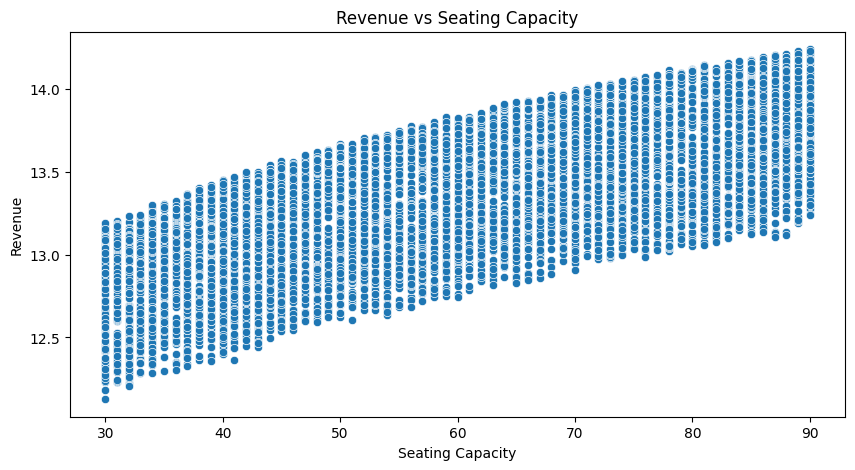

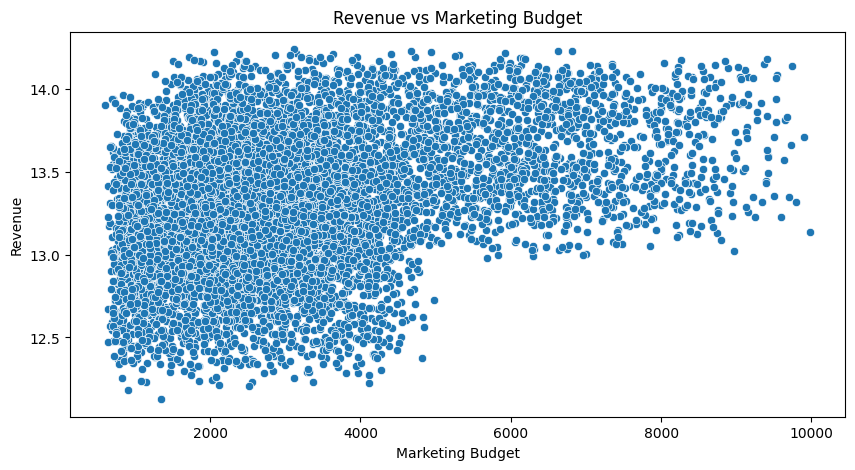

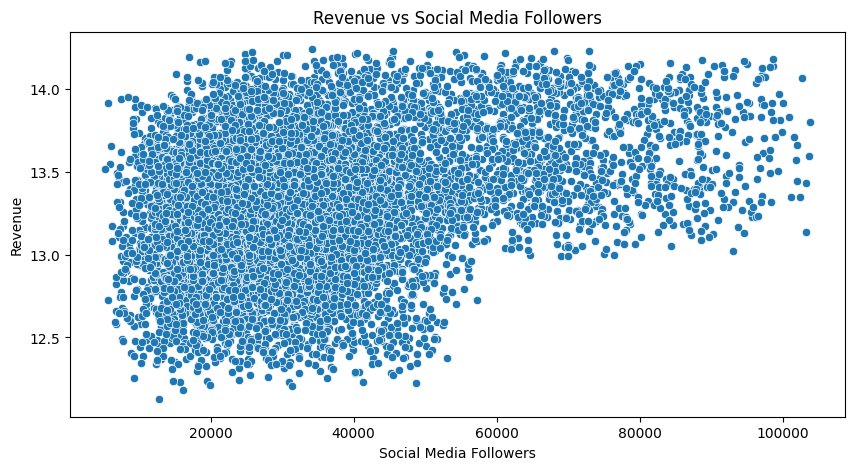

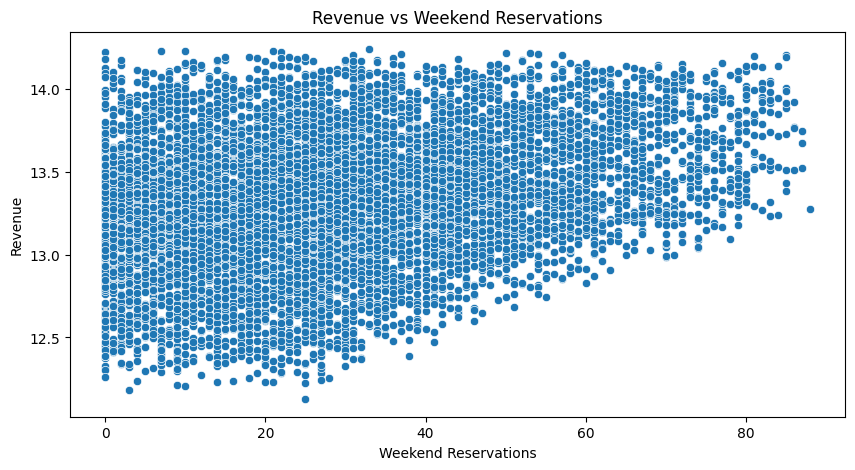

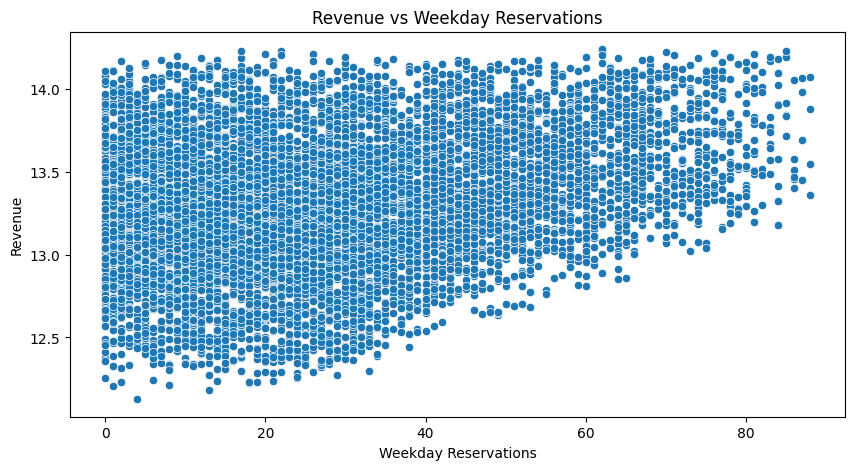

In [32]:
high_corr_features = ['Average Meal Price', 'Seating Capacity', 'Marketing Budget', 
                      'Social Media Followers', 'Weekend Reservations', 'Weekday Reservations']

for features in high_corr_features:
    plt.figure(figsize=(10,5))
    sns.scatterplot(df[num_data], x=features, y='Revenue')
    plt.title(f"Revenue vs {features}")

* The scatter plot of *revenue* and other *numeric* data from the shows a clearly arranged incremental pattern between 

* i. Revenue vs Average Meal Price and ii Revenue vs Seating Capacity

* i and ii indicates are gradual increment in revenue generated by restaurants as meal price and seating capacity increases - indicating a directly proportional relationship between revenue and seating capaciy and meal price

* Also there is a bit clusters from meal price of 30 - 50 and seating capacity of 30 - 80 indicating a decline in the number of restuarants within the range, also the same with less clusters noticed around high meal price and high seat capacity when corroborated with the revenue generated.

* The other 4 qauntities shows a near linear increment with bit of chaotic dataset showing outskirt distribution of datasets away from the normal distribution - more reason why the numerical correlations are not above .5

#### Bivariate visualization of Revenue vs Other Categorical Datasets selected from our 'Sample_data'

In [33]:
cate_data

['Location', 'Cuisine', 'Parking Availability']

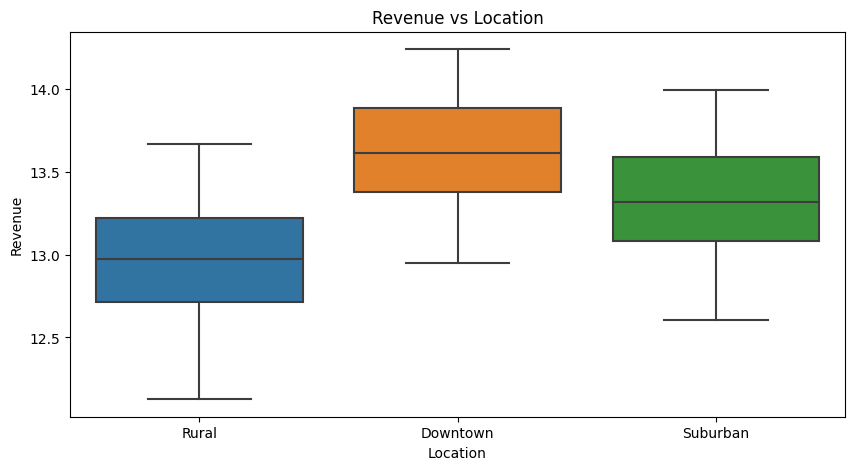

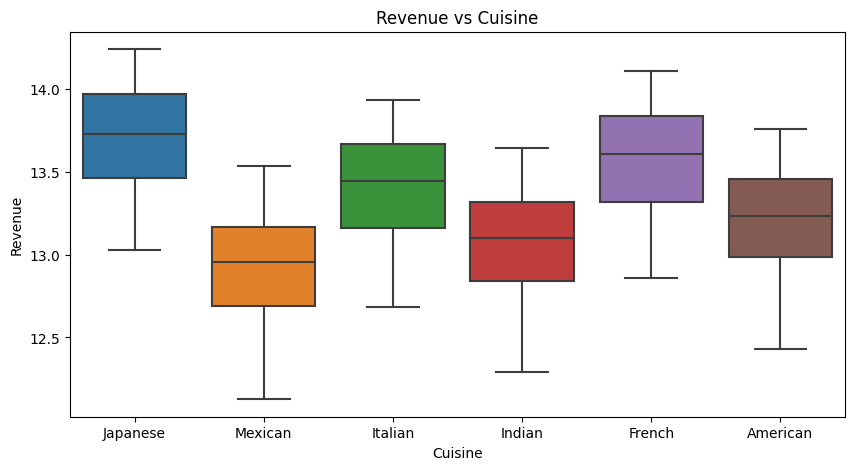

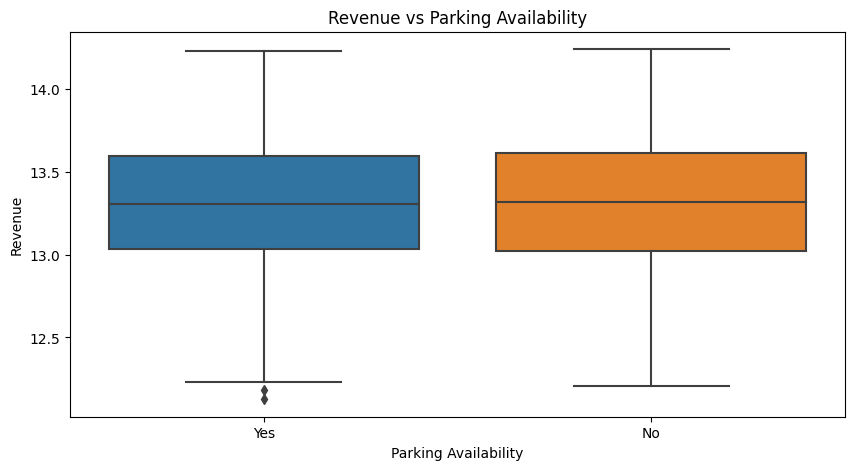

In [34]:
cate_data = ['Location', 'Cuisine', 'Parking Availability']

for feature in cate_data:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df, x=feature, y='Revenue')
    plt.title(f'Revenue vs {feature}')

* The box plots of revenue vs location and revenue vs cuisine hold subtle insights in their distributioin. 

* In the plot of Revenue vs location, we could observe the amount of reveneue generated by 'Rural restaurants' are relatively lower than what 'Downtown' and 'Suburban' restaurants generated. 

* In the analysis, the rural box plots shows the whiskers - Q1 and Q3 as between 0.2 and 0.8 (200k to 800k) in this case

* Also the median revnue is held at .4 (400k) on average - there are no outliers

* In the box plots for downtown, the whiskers - Q1 and Q3 are well above 0.2 mark for rural box plot showing a signficant different in the base price based on the locality. 

* The median mark for downtown box plot is at 0.8 - 800k with Q3 whisker bearing the highest revenue at 1.4 million dollar

* While the median mark for suburbans is at 0.6 - 600k and lower and upper quatile - Q1 and Q3 are at 0.4 and 1.1 mark respectively

* The unqual box distribution in downtown and suburban locations as compared to equal division of the rural box plots, shows that more restaurants in the downtowns and suburbans generated more revenues (above 600k for suburbans and above 800k for downtowns) than the rural box plot which highest generated revenue is at 800k

* Also quit a good number of restaurants in the downtown generates between > 800k < 1.1million in revenue as compared to surburbans that majorly generate between 600k - 800k - this could be seen from the box division

* Majority of the restuarants in the rural settings generats well above 400k but not more than 600k. 

* Generally, downtowns generates revenues x2 of what rural restaurants generates with suburbans been the affordable meal for the masses

* Revenue and Cuisine holds a unique insights from the box plots

* Interestingly, Japanese, French and Italian cuisins are on the top 3 cuisines with highest generated revenues. 

* Comparing their whiskers and median: 

* The the median revenues generated by Japanese cuisines are above 900k as compared to Italian cuisines at 800k while French cuisines are on average of 700k

* The box plots also shows the lower and upper boundary for Japanese cuisine at 700k and 1.1million with median 800k, with Q3 whisker hitting 1.4 million mark showing the highest revenunue generated by Japanese cuisin

* American cuisine tops Indian and Mexican cuisine with average revenue generation of 500k and a Q3 whisker of 900k

* Revenue vs Parking Space

#### Multivariate Analysis

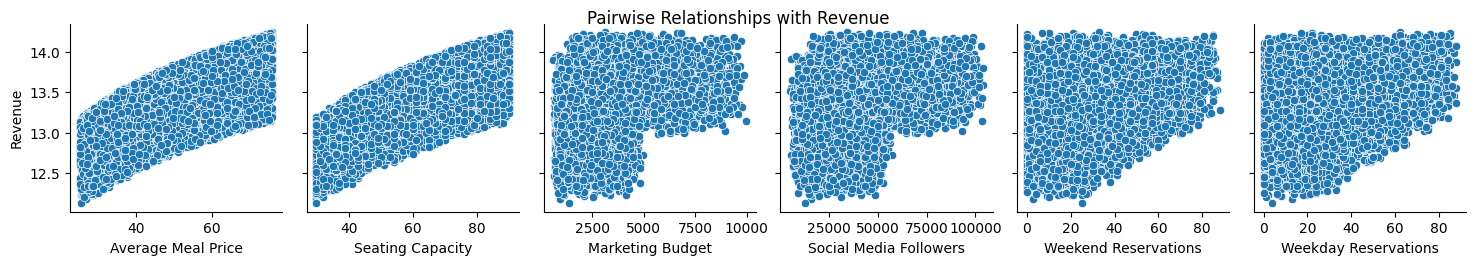

In [35]:
# We intend to pair plots to investigate relationships btwn revenue and multiple features

sns.pairplot(df, x_vars =(high_corr_features), y_vars ='Revenue', kind= 'scatter')
plt.suptitle('Pairwise Relationships with Revenue', y=1.02)
plt.show()